# Market Equilibrium under different market forms

Import various packages

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from scipy import optimize,arange
from numpy import array

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Model Description

We consider the standard economic promlem for a Monopoly firm maximizing it's profits.

The aggregate market demand is given by
$$Q(p)=A-\alpha\cdot p$$
which corresponds to the inverse market demand function
$$p(Q)=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot Q$$

and the Monopoly profits are given $$\pi(q)=p\cdot q-c(q)=\left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot q\right)\cdot q-c\cdot q$$

where $q=Q$, $p(Q)$ is a linear market demand curve and $c(q)$ is the firms cost-function with constants cost $c$. 

# Market Equilibrium

## Analytical Solution

Using Sympy, we seek to find an analytical expression for the market equilibrium when one firm has monopoly power, i.e. solve the monopoly firm's maximization problem

\\[ \max_{q}\pi(q)=\max_{q} \left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot q\right)\cdot q-c\cdot q \\]

Which has the standard solution given by:
$$q^{\ast}=\frac{A-\alpha\cdot c}{2}\wedge p^{\ast}=\frac{A+\alpha\cdot c}{2\cdot\alpha}$$

In [2]:
sm.init_printing(use_unicode=True) # sets printing on
# Defining variables;
A = sm.symbols('A')
q = sm.symbols('q')
c = sm.symbols('c')
alpha=sm.symbols('alpha')


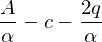

In [3]:
Pi = (A/alpha-q/alpha)*q-c*q # Define the firms profit function
F = sm.diff(Pi,q) # Take the first order condition
F


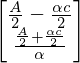

In [4]:
Mq = sm.solve(F,q)[0] # Solves for market quantiy
# And the market price is given by;
Mp=(A-Mq)*1/alpha
sm.Matrix([Mq,Mp]) # Prints the market quanty and price


In [5]:
#For later use, We turn the above solution into a Python function
Mq_func = sm.lambdify((A,alpha,c),Mq)
Mp_func = sm.lambdify((A,alpha,c),Mp)

## Numerical Solution

As a brief introduction to solving the problem numerically, we use a solver like fsolve to solve the first-order condition given the following parameter values:

Remember, the first-order condition is given by:
$$\frac{A}{\alpha}-c-\frac{2q}{\alpha}=0$$

In [6]:
A = 4
alpha = 2 
c = 1
output = optimize.fsolve(lambda q: 2-q-1,0)
print(f'analytical solution for market quanty is: {Mq_func(A,alpha,c):.2f}')
print(f' Solution with fsolve for market quanty is: {output}')
print(f'analytical solution for market price is: {Mp_func(A,alpha,c):.2f}')

analytical solution for market quanty is: 1.00
 Solution with fsolve for market quanty is: [1.]
analytical solution for market price is: 1.50


However for later use, It is perhaps more efficent to make Python maximize the firm's profits directly. However, as scipy only has minimization procedueres. We contunie to minimize $-\pi(q)$, i.e. minimizing negativ profits is the same as maximizing profits. 

Below we first define functions for market demand and costs in python

In [7]:
def demand(Q):
    return A/alpha-1/alpha*Q

def cost(q,c):  # c is constant marginal cost
    return c*q

In [8]:
def minus_profits(q,*args):         # we want to see profits as a function of q when we maximize profits or
    return -(demand(q)*q-cost(q,c)) # minimize minus_profits; hence c is specified as "*args", when calling fmin
                                    # we specify the c in the "args=(c,)"
x0 = 0 # Initial guess
c = 1.0 # Specify the value of the constant cost 'c'
A=4.0 # Specify the value of the Constant in the market demand function Q(p)
alpha=2.0 # Specify the  slope coefficient in Q(p)

output = optimize.fmin(minus_profits,x0,args=(c,)) # note the comma in "args(c,)"; it needs to be there!
price=A/alpha-1/alpha*output
print(output,price)

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 25
         Function evaluations: 50
[1.] [1.5]


Hence, the optimal output to produce is 1, which yields the maximum profits of $-\cdot(-0.5)=0.5$

For the specified parameter values, we have plotted the monopoly firm's profit function below.

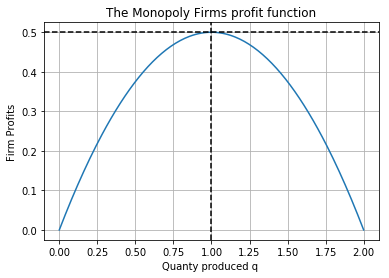

In [9]:
# Define the expression whose roots we want to find

A = 4.0 # Specify the value of the Constant in the market demand function Q(p) 
alpha = 2.0 # Specify the  slope coefficient in Q(p)
c = 1.0 # Specify the value of the constant cost 'c'

func = lambda q : (A/alpha-q/alpha)*q-c*q # Defines the profit function give using a lambda function.

# Plot the profit function

q = np.linspace(0, 2, 200) # Return evenly spaced numbers over a specified interval from 0 to 2 .

plt.plot(q, func(q)) 
plt.axhline(y=0.5,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=1,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.xlabel("Quanty produced q ")
plt.ylabel("Firm Profits")
plt.grid()
plt.title('The Monopoly Firms profit function')
plt.show()

And we can plot the market equilibrium price and output in a standard diagram as shown below.

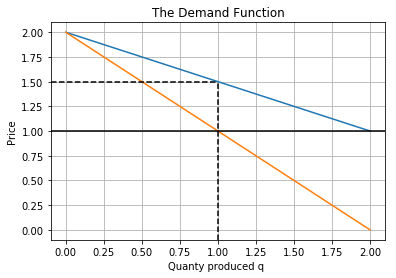

In [10]:
# Define marginal cost:
def MR(Q):
    return A/alpha-2/alpha*Q


plt.plot(q, demand(q)) 
plt.plot(q, MR(q))
plt.axhline(y=c,color='k') # creates a horizontal line in the plot at func(q)=0.5
plt.axvline(x=output,ymin=0,ymax=0.73,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
plt.axhline(y=price,xmin=0, xmax=0.5,linestyle='dashed',color='k')
plt.xlabel("Quanty produced q ")
plt.ylabel("Price")
plt.grid()
plt.title('The Demand Function')
plt.show()

Both plottet side by side.

Text(0.5, 1.0, 'The Market Equilibrium')

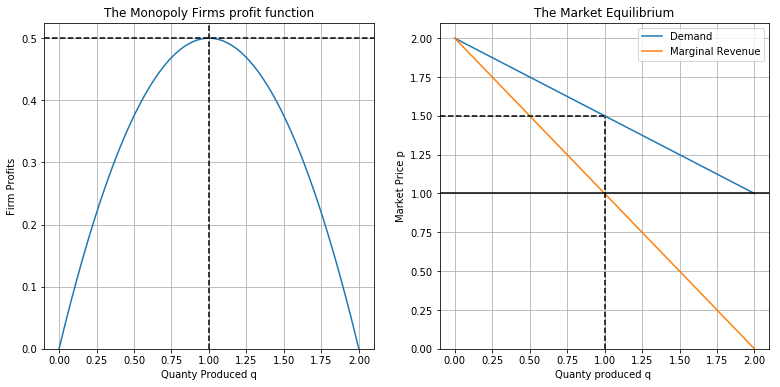

In [64]:
f = plt.figure(figsize=(13,6))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(q, func(q))
ax.set_title('The Monopoly Firms profit function')
ax.set_xlabel('Quanty Produced q')
ax.set_ylabel('Firm Profits')
ax.axhline(y=0.5,linestyle='dashed',color='k') # creates a horizontal line in the plot at func(q)=0.5
ax.axvline(x=1,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
ax.set_ylim(0,)  # set a lower limit for y-axis at zero.
ax.grid()

ax2.plot(q, demand(q),label='Demand')
ax2.plot(q,MR(q), label='Marginal Revenue')
ax2.legend(loc='upper right')
ax2.grid()
ax2.axhline(y=c,color='k', label='Marginal Cost') # creates a horizontal line in the plot at func(q)=0.5
ax2.axvline(x=output,ymin=0,ymax=0.71,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=0.5
ax2.axhline(y=price,xmin=0, xmax=0.5,linestyle='dashed',color='k')
ax2.set_xlabel("Quanty produced q ")
ax2.set_ylabel("Market Price p")
ax2.set_ylim(0,)
ax2.set_title('The Market Equilibrium')

We see that when the monopoly firm is producing $q=5$, they get the maximum profits of 0.5. In the right figure, we see that the monopoly firm maximises profits in the point, where the margianl revenue curve intersect the marginal cost cuvr(black line). The two curves intersect at $q=1$, and the market price is $p=1.5$ as given by the demand curve.


# Extentions: Solving for market equilibrium in a duopoly setting

## Market Equilibrium with Cournot Competition

Consider the inverse demand funcion with idencital goods
$$p(Q)=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot Q=\frac{A}{\alpha}-\frac{1}{\alpha}\cdot(q_1+q_2)$$

where $q_1$ is firm 1's output and $q_2$ is firm 2's output. $Q=q_1+q_2$. 

Both firms have identical cost-function $c(q_i)=c\cdot q_i$. So given cost and demand, each firm have the following profit function:
$$\pi_{i}(q_{i},q_{j})=p_i(q_i,q_j)q_i-c(q_i)$$,
$i,j\in\{0,1\},i\neq j$, which they seek to maximize

As this is the standard Cournot problem with two firms competing in quanties, we know that the in equilibrium both firms produces the same Cournot output level given by:
$$q_1^{C}=q_2^{C}=\frac{A-\alpha c}{3}$$

### Analytical Solution

We can use **sympy** to find an analytical expression for the market equilibrium/ the Cournot Nash Equilibrium, i.e. solving for the pair $(q_1^{C},q_2^{C})$ for which both firms play a best-response to the other firms equilibrium strategy. Hence
$$\max_{q_{i}} \pi_{i}(q_i,q_j^{\ast})=\max \left(\frac{A}{\alpha}-\frac{1}{\alpha}\cdot(q_i+q_j^{\ast})-c\right)q_i $$



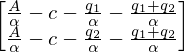

In [153]:
# Defining variables;
A = sm.symbols('A') # Constant in Q(p)
q1 = sm.symbols('q1') # Firm 1's output
q2 = sm.symbols('q2') # Firm 2's output
c = sm.symbols('c') # Contant cost
alpha=sm.symbols('alpha') # Slope coefficient in Q(p)

Pi1 = (A/alpha-1/alpha*(q1+q2))*q1-c*q1 # Firm 1's profit function

Pi2 = (A/alpha-1/alpha*(q1+q2))*q2-c*q2 # Frim 2's profit function

F1 = sm.diff(Pi1,q1) # Take the first order condition for firm 1
F2 = sm.diff(Pi2,q2) # Take the first order condition for firm 2
sm.Matrix([F1,F2]) # Prints the first order conditions

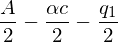

In [154]:
Cq2 = sm.solve(F2,q2)[0] # Solves Firm 2's FOC for q2.
Cq2

In [155]:
Cq1 = sm.solve(F1,q2)[0] # Solves Firm 1's FOC for q2.
Cq1

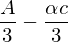

In [156]:
CON=sm.solve(Cq1-Cq2,q1)[0] # In Eq Cq1=Cq2, so solve for q1
CON

Given the standard symmetry argument, we know that both firms produce the same in equilibrium. Hence
$$q_1^{C}=q_2^{C}=\frac{A-\alpha c}{3}$$
as given above.

The total markey quanty and price is found below.

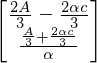

In [157]:
MCQ = 2*CON  #  market quantiy
# And the market price is given by;
MCP=(A-MCQ)*1/alpha
sm.Matrix([MCQ,MCP]) # Prints the market quanty and price

These can again by turned into python-functions to compare the analytical solution with the numerical solution

In [158]:
CON_func = sm.lambdify((A,alpha,c),CON) # Cournot quanty
MCP_func = sm.lambdify((A,alpha,c),MCP) # Market price

### Numerical Solution

In [159]:
def demand(q1,q2,b): # Define demand 
    return A/alpha-1/alpha*(q1+b*q2)

def cost(q,c):
    if q == 0:
     cost = 0
    else:
     cost = c*q
    return cost

In [160]:
def profit(q1,q2,c1,b): # Define a function for profits
    return demand(q1,q2,b)*q1-cost(q1,c1)

Define reaction functions.

As we know scipy has various methods to optimize function. However as they are defined as minimization problems, maximizing a function $f(x)$ is the same as minimzing $-f(x)$.

In [161]:
def reaction(q2,c1,b):
    q1 = optimize.brute(lambda q: -profit(q,q2,c1,b), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return q1[0]

A solution method which can be used to solve many economics problems to find the Nash equilibrium, is to solve for the equilibirum as fixed point.

Hence we a looking for fixed point in which the following is true.
$$\left(\begin{matrix}
           q_{1}^{\ast} \\
           q_{2}^{\ast} 
         \end{matrix}\right)=\left(\begin{matrix}
           r_{1}(q_2^{\ast}) \\
           r_{2}(q_1^{\ast}) 
         \end{matrix}\right) 
        $$
 
where $r_1(q_2)$ is firm 1's reaction-function to firm 2's production level and vice versa.

Numerically this can be solved by defining a vector function:
$$f(q)=\left(\begin{matrix}
           r_{1}(q_2^{\ast}) \\
           r_{2}(q_1^{\ast}) 
         \end{matrix}\right)$$
and solve for a point $q^{\ast}=(q_1^{\ast},q_2^{\ast})$ such that $f(q^{\ast})=q^{\ast}$ 

We then define a function defined ad $x-f(x)$ and look for the solution $x^{\ast}-f(x^{\ast})=0$

In [162]:
def vector_reaction(q,param): # vector param = (b,c1,c2)
    return array(q)-array([reaction(q[1],param[1],param[0]),reaction(q[0],param[2],param[0])])

In [163]:
param = [1.0,1.0,1.0]
q0 = [0.3, 0.3]
alpha=2
A=4
ans = optimize.fsolve(vector_reaction, q0, args = (param))
print(ans)

[0.6666581 0.6666581]


In [164]:
A = 4
alpha = 2 
c = 1
print(f'analytical solution for Cournot quanty is: {CON_func(A,alpha,c):.2f}')
print(f'analytical solution for market price is: {MCP_func(A,alpha,c):.2f}')
print(f' Solution with fsolve for market quanty is: {ans}')


analytical solution for Cournot quanty is: 0.67
analytical solution for market price is: 1.33
 Solution with fsolve for market quanty is: [0.6666581 0.6666581]


And we see that the numerical solution for the markey quanty is fairly close to the analytical solution at $q_1^{C}=q_2^{C}=\frac{2}{3}$

Below we illustrate the equilibrium quanties visually by plotting the two firms reaction-functions/best-response functions. The equilibrium quanties is found in the point in which they intersect.

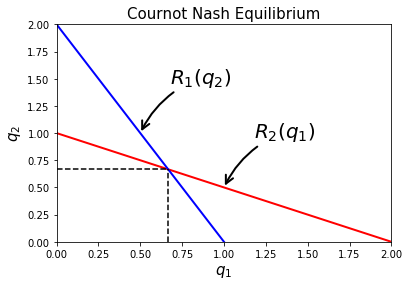

In [195]:
# Define the expression whose roots we want to find

A = 4.0 # Specify the value of the Constant in the market demand function Q(p) 
alpha = 2.0 # Specify the  slope coefficient in Q(p)
c = 1.0 # Specify the value of the constant cost 'c'

func1 = lambda q : 1/2*(A-alpha*c-q) # Defines the best-response function for firm 1using a lambda function.
func2 = lambda q : A-alpha*c-2*q

# Plot the profit function

q = np.linspace(0, 2, 200) # Return evenly spaced numbers over a specified interval from 0 to 2 .

plt.clf()
plt.plot(q, func1(q),'-', color = 'r', linewidth = 2)
plt.plot(q,func2(q),'-', color = 'b', linewidth = 2)
plt.title("Cournot Nash Equilibrium",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.axvline(x=2/3,ymin=0,ymax=1/3,linestyle='dashed',color='k') # creates a vertical line in the plot at  q=2/3
plt.axhline(y=2/3,xmin=0,xmax=1/3,linestyle='dashed',color='k') # creates a horizontal line in the plot at  q=2/3

plt.annotate('$R_2(q_1)$', xy=(1,0.5),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$R_1(q_2)$', xy=(0.5,1),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.xlim(0,2)
plt.ylim(0,2)

## Market Equilibrium with Betrand Competition

# Conclusion

We see that the assumption about the market structure have a critical impact on the market equilibrium. We have shown that under the standard assumption, when there is only on firm in market, which utilizes it's monopoly power, the market equilibrium output is inefficiently low and the equilibrium price is ineffciently high from a social welfare perspective. When the number of firms increases to two, we show that the market inefficiency decreases but at different degrees depending on competition type. If the firms compete in quanties (Cournot), the market output is still lower than the social optimum, however there is still some competition between the firms, which results in a lower market price and higher market output compared to the monopoly case. Lastly, we show that when the two firms compete in prices(bertrand) the market equilibrium is parato efficient. As both firms seek to undercut the other firm resulting in both firms asking a price equal to their margianl costs (assumed identical). Hence even though their are only two firms, the market equilibrium is efficient as it is identical to social optimum with a market price equal to the marginal costs.